NN_TEST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
test_image = x_test[0]

test_image_reshape = test_image.reshape(1, 784).astype('float64')
# 28 * 28이미지를 784개로 reshape하고, 1--> 데이터가 1개다. batchsize

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/영우_4기_딥러닝/dataset/my_NN_Test.h5')

In [ ]:
y_pred = model.predict(test_image_reshape)

In [ ]:
print(y_pred)

In [ ]:
index = np.argmax(y_pred)
print(index)

In [ ]:
index = np.argmax(y_pred)
value = y_pred[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"   "+str(value))
plt.show()

NN-Test-Rotation

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 이미지 회전 변환 매트릭스 구하기
M = cv2.getRotationMatrix2D((28/2, 28/2), 0, 1) # Matrix생성

# 이미지 이동 변환 매트릭스 구하기
M[0, 2] = M[0, 2] +3
M[1, 2] = M[1, 2] +3

# 이미지 변환 매트릭스 적용
test_image = cv2.warpAffine(x_train[5], M, (28, 28)) #image에 matrix곱

In [ ]:
plt.imshow(test_image, cmap="Greys")

In [ ]:
test_image_reshape = test_image.reshape(1,784).astype('float64')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/영우_4기_딥러닝/dataset/my_NN_Test.h5')

In [ ]:
y_pred = model.predict(test_image_reshape)

In [ ]:
index = np.argmax(y_pred)
value = y_pred[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"   "+str(value))
plt.show()

In [ ]:
print(value)

In [ ]:
plt.imshow(x_train[5], cmap='Greys')

In [53]:
(32+(2*2)-5)/1 +1 # input volume ; 32*32*3 , 10 5*5 filters with stride 1, pad2 => output volume size?

32.0

### CNN_MNIST 분류 

In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 데이터 (배치사이즈 x 28 x 28 x 1)로 이미지로 변환 --> 그레이스케일 채널은 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# CNN 모델 설계
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides =1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

In [ ]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= [metrics])

In [ ]:
model_dir = './cnn_mnist_model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path='./cnn_mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
         

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1, callbacks=callback_list)

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Fashion MNIST

In [30]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [33]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [34]:

## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

## 정답을 바이너리화 함. 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [35]:
# CNN 모델 설계.
## 모델

input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides =1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2305

In [36]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= [metrics])

In [37]:
# 모델 최적화 설정
model_dir = './CNN_Fasion_MNIST_model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [40]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=1, callbacks=callback_list)
# 테스트 정확도 출력



Epoch 1/10
240/240 [==============================] - 38s 158ms/step - loss: 0.4135 - categorical_accuracy: 0.8705 - val_loss: 0.4328 - val_categorical_accuracy: 0.8674

Epoch 00001: val_loss improved from 0.49340 to 0.43281, saving model to ./CNN_Fasion_MNIST_model/01-0.4328.hdf5
Epoch 2/10
240/240 [==============================] - 38s 158ms/step - loss: 0.3727 - categorical_accuracy: 0.8783 - val_loss: 0.4106 - val_categorical_accuracy: 0.8725

Epoch 00002: val_loss improved from 0.43281 to 0.41064, saving model to ./CNN_Fasion_MNIST_model/02-0.4106.hdf5
Epoch 3/10
240/240 [==============================] - 38s 158ms/step - loss: 0.3398 - categorical_accuracy: 0.8881 - val_loss: 0.3952 - val_categorical_accuracy: 0.8748

Epoch 00003: val_loss improved from 0.41064 to 0.39520, saving model to ./CNN_Fasion_MNIST_model/03-0.3952.hdf5
Epoch 4/10
240/240 [==============================] - 38s 158ms/step - loss: 0.3114 - categorical_accuracy: 0.8945 - val_loss: 0.3840 - val_categorical_ac

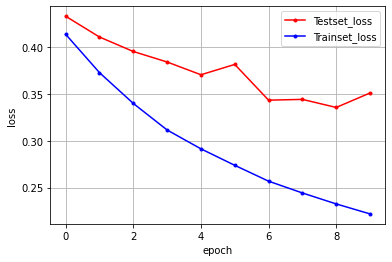

In [41]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [43]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3756 - categorical_accuracy: 0.8830

Test accuracy: 0.8830000162124634


### 10far10 data set 

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [46]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [47]:
# 데이터 shape 확인하기 

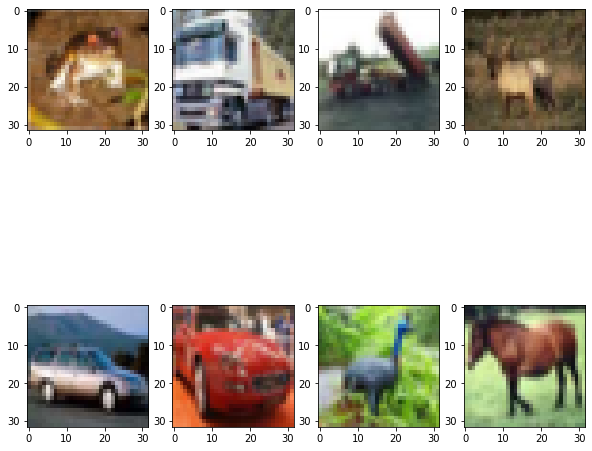

In [48]:
# 데이터 시각화
plt.figure(figsize=(10, 10))
for i, img in enumerate(x_train[:8]):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
plt.show()


In [59]:
# Y라벨 one hot encording 수행
# Sklearn의 case1
from sklearn.preprocessing import LabelEncoder 
e = LabelEncoder()
e.fit(y_train)
print("Label Class String : {}".format(e.classes_))

Y = e.fit_transform(y_train)
print("Label Class int : {}".format(Y))

y_encoded = tf.keras.utils.to_categorical(Y)
print("case 1 One hot Label class: {}". format(y_encoded) )



Label Class String : [0 1 2 3 4 5 6 7 8 9]
Label Class int : [6 9 9 ... 9 1 1]
case 1 One hot Label class: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
import pandas as pd
# Pandas의 case2
#one_hot_label = pd.get_dummies(y_train)
#print("case2 one_hot_label : ", one_hot_label)
#print(one_hot_label.shape)
print(x_train_norm.shape)
print(x_test_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [52]:
# 정규화 
print('최소값', np.min(x_train), '최대값:', np.max(x_train))
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_test_norm))
x_train_norm.shape

최소값 0 최대값: 255
최소값: 0.0 최대값: 1.0


(50000, 32, 32, 3)

In [67]:
# 모델1 설계(kernel_initialzer, callback, Dropout)

# 32채널 커널 사이즈 3 Conv2D, relu
# 32
input_layer = tf.keras.layers.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3, 3), strides =1, activation='relu', padding='same')(input_layer)

# 64채널
# 64채널
x = tf.keras.layers.MaxPool2D((3, 3))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu')(x)


#128채널
#128채널

x = tf.keras.layers.MaxPool2D((128, (3,3)))(x)

# FCL
# Flatten()
x = tf.keras.layers.Flatten()(x)

# Dense() #512채널 
output_layer = tf.keras.layers.Dense(512, activation='softmax')(x)

# 마지막 분류 
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()


ValueError: ignored

In [ ]:
# model1.summary()
# model.compile()
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= [metrics])


In [ ]:
# 모델 최적화 설정
model_dir = './CNN_Fasion_MNIST_model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [ ]:
# model.fit() # EarlyStopping 적용 patience = 7
# 모델의 실행
history = model.fit(x_train_norm, y_encoded, validation_split=0.2, epochs=10, batch_size=200, verbose=1, callbacks=callback_list)
# 테스트 정확도 출력


In [ ]:
# 모델 2 설계 (kernel_initialzer, callback, BatchNormalization)

# 32채널 커널 사이즈 3 Conv2D, relu
# 32
input_layer = tf.keras.layers.Input(shape=(32, 32, 3))
x = tf.keras.layers.Conv2D(32, (3, 3), strides =1, activation='relu', padding='same')(input_layer)

# 64채널
# 64채널
x = tf.keras.layers.MaxPool2D((3, 3))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu')(x)


#128채널
#128채널

x = tf.keras.layers.MaxPool2D((128, (3,3)))(x)

# FCL
# Flatten()
x = tf.keras.layers.Flatten()(x)

# Dense() #512채널 
output_layer = tf.keras.layers.Dense(512, activation='softmax')(x)

# 마지막 분류 
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()
